# ДОМАШНЕЕ ЗАДАНИЕ 1. Дескриптивный анализ данных


Каткова Дарья, ИУ6-22М

### Цель работы

Приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.

### Вариант: 5-1-3

In [1]:
surname = "Каткова"  # Фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("Задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  5
Задача № 1, шаг 11 - вариант:  1
Задача № 2 - вариант:  3


## Задание 1. Анализ индикаторов качества государственного управления (WGI)

In [8]:
# Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных в DataFrame и сортировка данных по убыванию индекса DataFrame

In [16]:
df_corruption = pd.read_excel('wgidataset.xlsx', sheet_name = "ControlofCorruption", header = 14)

# Сортировка по убыванию индекса
df_corruption = df_corruption.sort_index(ascending = False)

# Вывод десяти строк, начиная с головы
df_corruption.head(10)

,Country/Territory,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper,Estimate.1,StdErr.1,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
213,Zimbabwe,ZWE,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,-0.504802,0.198134,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
212,Zambia,ZMB,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,-0.853156,0.227055,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
211,"Congo, Dem. Rep.",ZAR,-1.647852,0.315914,3.0,0.000000,0.000000,12.365591,-1.416679,0.310343,...,11.0,4.285714,0.000000,6.666667,-1.544474,0.149016,12.0,3.301887,0.471698,7.075472
210,South Africa,ZAF,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,0.638809,0.188628,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
209,Serbia,SRB,-1.140072,0.262077,4.0,11.827957,0.537634,29.032259,-1.195605,0.191027,...,9.0,35.714287,26.190475,48.095238,-0.456188,0.158030,9.0,35.377357,24.528301,48.113209
208,"Yemen, Rep.",YEM,-0.743732,0.262077,4.0,27.419355,8.602151,47.311829,-0.998175,0.227055,...,8.0,1.428571,0.000000,6.190476,-1.679558,0.179638,8.0,1.415094,0.000000,6.603774
207,"Jersey, Channel Islands",JEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,81.904762,62.857143,93.809525,1.028838,0.403169,1.0,82.075470,63.679245,93.867928
206,West Bank and Gaza,WBG,0.041492,0.340507,2.0,59.139786,35.483871,73.118279,0.025494,0.324013,...,5.0,25.238094,11.428572,44.285713,-0.702682,0.273802,4.0,25.000000,12.264151,47.169811
205,Vanuatu,VUT,0.216309,0.439480,1.0,62.365593,36.559139,80.645164,0.238910,0.424762,...,6.0,53.333332,36.666668,62.857143,-0.028941,0.257037,6.0,53.301888,35.849056,65.094337
204,Vietnam,VNM,-0.489799,0.212363,6.0,37.096775,24.731182,52.150539,-0.491154,0.180076,...,10.0,45.714287,31.904762,51.904762,-0.287283,0.154586,10.0,45.754719,33.490566,52.830189


### Отображение данных по индексу WGI за 2022 год в виде горизонтального столбчатого графика (rank)

<Axes: title={'center': '2022 Rank'}, ylabel='Country/Territory'>

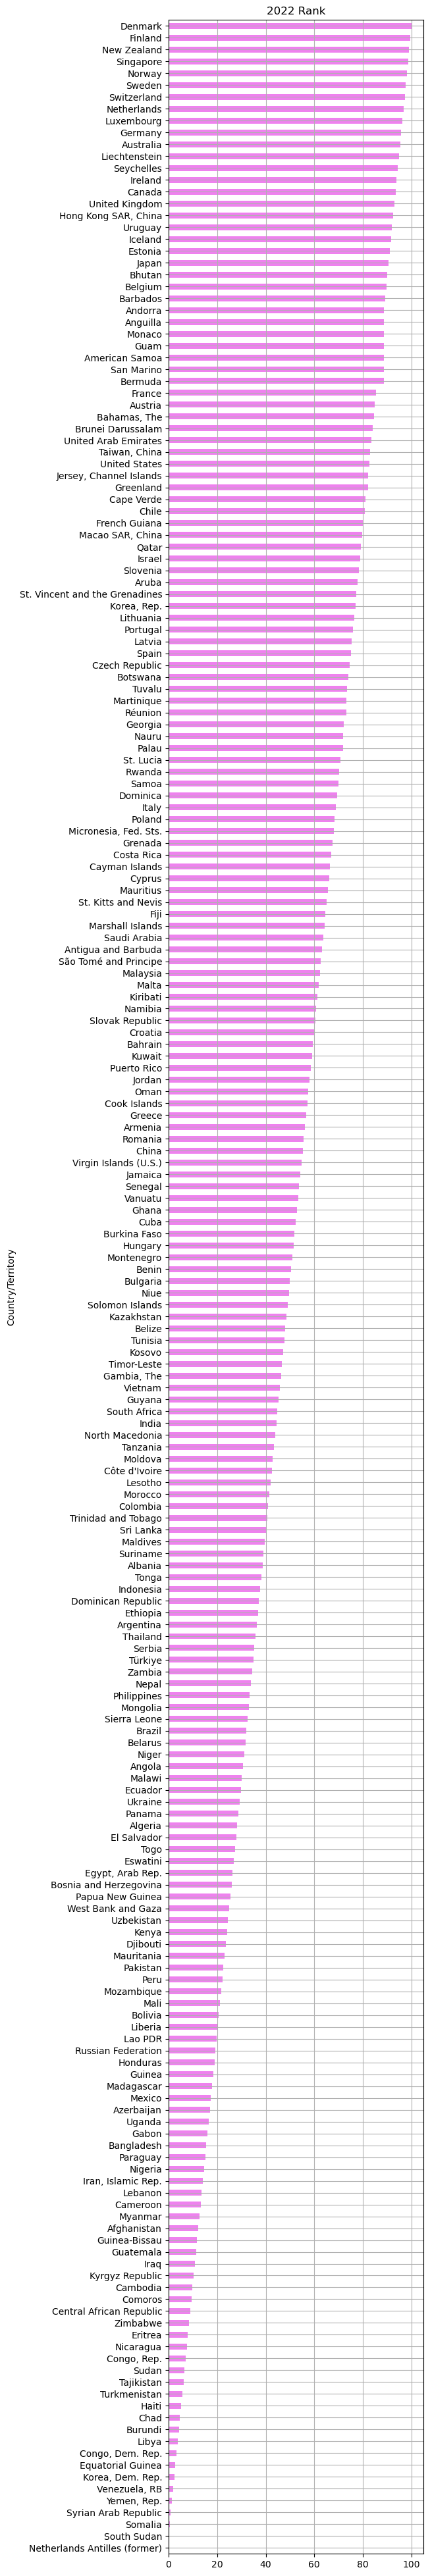

In [17]:
# Установим индекс Country/Territory
df_rank = df_corruption.set_index('Country/Territory')

# Выбираем для отображения Rank за 2022 год, заполняем нулями там, где null и сортируем по Rank за 2022 год
df_rank = df_rank[["Rank.23"]].fillna(0).sort_values("Rank.23")

# Отображаем данные в виде горизонтального столбчатого графика
df_rank.plot.barh(color = 'violet', figsize = (5, 50), title = "2022 Rank", legend = False, grid = True)

### Сформируем DataFrame из исходного для региона в соответствии с вариантом 5: Sub Saharan Africa

In [24]:
df_regions = pd.read_excel("regions.xlsx") 

# Объединим regions.xlsx и ControlofCorruption по Code
df_merged = pd.merge(df_regions, df_corruption, on='Code')

# Сформируем DataFrame для региона Sub Saharan Africa (SSA) и отсортируем по убыванию индекса
df_SSA = df_merged[df_merged.Region=='SSA'].sort_index(ascending = False)
df_SSA.head(10)

,Country,Code,Region,Country/Territory,Estimate,StdErr,NumSrc,Rank,Lower,Upper,...,NumSrc.22,Rank.22,Lower.22,Upper.22,Estimate.23,StdErr.23,NumSrc.23,Rank.23,Lower.23,Upper.23
176,Zimbabwe,ZWE,SSA,Zimbabwe,-0.278847,0.244907,5.0,47.849461,30.645161,60.752689,...,12.0,10.000000,4.285714,17.619047,-1.255139,0.151262,12.0,8.490566,4.245283,17.924528
175,Zambia,ZMB,SSA,Zambia,-0.840641,0.262077,4.0,24.731182,5.913979,41.397850,...,12.0,25.714285,17.619047,33.809525,-0.529200,0.152557,12.0,34.433964,23.584906,45.754719
164,Uganda,UGA,SSA,Uganda,-0.723757,0.262077,4.0,27.956989,10.752688,47.311829,...,12.0,16.190475,8.095238,24.285715,-1.041796,0.151262,12.0,16.509434,7.075472,23.113207
159,Togo,TGO,SSA,Togo,-0.842621,0.315914,3.0,24.193548,3.225806,46.236561,...,12.0,27.619047,18.571428,36.666668,-0.649672,0.151262,12.0,27.358490,20.283018,39.150944
157,Tanzania,TZA,SSA,Tanzania,-0.702762,0.262077,4.0,29.569893,12.365591,47.849461,...,13.0,40.000000,29.047619,49.523811,-0.341100,0.147000,13.0,43.396225,31.132076,51.415092
150,Sudan,SDN,SSA,Sudan,-1.240006,0.262077,4.0,6.989247,0.000000,25.268818,...,12.0,8.095238,4.285714,16.190475,-1.397860,0.152435,11.0,6.603774,1.886792,12.735849
147,South Sudan,SSD,SSA,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0.000000,0.000000,4.285714,-1.855755,0.210238,7.0,0.000000,0.000000,4.245283
146,South Africa,ZAF,SSA,South Africa,0.732927,0.210325,6.0,76.344086,66.129036,81.182793,...,11.0,53.809525,46.190475,60.000000,-0.319765,0.157883,11.0,44.811321,31.603773,52.358490
145,Somalia,SOM,SSA,Somalia,-1.273832,0.315914,3.0,5.376344,0.000000,26.344086,...,8.0,0.952381,0.000000,4.285714,-1.792455,0.180312,8.0,0.471698,0.000000,4.245283
140,Sierra Leone,SLE,SSA,Sierra Leone,-0.756474,0.315914,3.0,26.344086,4.838710,49.462364,...,13.0,36.190475,27.142857,48.095238,-0.563655,0.147000,13.0,32.547169,22.169811,43.867924


### Построение графиков индекса WGI за 1996-2022 для стран своего региона (estimate). 

In [25]:
# Установим индекс Country и отфильтруем по Estimate
df_estimate = df_SSA.set_index('Country').filter(regex='Estimate')
df_estimate.head(10)

,Estimate,Estimate.1,Estimate.2,Estimate.3,Estimate.4,Estimate.5,Estimate.6,Estimate.7,Estimate.8,Estimate.9,...,Estimate.14,Estimate.15,Estimate.16,Estimate.17,Estimate.18,Estimate.19,Estimate.20,Estimate.21,Estimate.22,Estimate.23
Country,,,,,,,,,,,,,,,,,,,,,
Zimbabwe,-0.278847,-0.504802,-1.127275,-1.156760,-1.188868,-1.253563,-1.314617,-1.372949,-1.404758,-1.348838,...,-1.419667,-1.404367,-1.337617,-1.288441,-1.298485,-1.246001,-1.271190,-1.287992,-1.253550,-1.255139
Zambia,-0.840641,-0.853156,-0.818261,-0.758519,-0.641859,-0.604488,-0.592440,-0.551736,-0.398109,-0.389601,...,-0.315543,-0.347683,-0.368301,-0.426890,-0.567721,-0.678602,-0.673918,-0.733921,-0.759728,-0.529200
Uganda,-0.723757,-0.989971,-1.028190,-1.025739,-0.948509,-0.811879,-0.833649,-0.787619,-0.825755,-0.840164,...,-1.055946,-1.097377,-1.081077,-1.086225,-1.069671,-1.050884,-1.176579,-1.068076,-1.030537,-1.041796
Togo,-0.842621,-0.831448,-0.751899,-0.758070,-0.902239,-0.943994,-0.873771,-1.049607,-0.997273,-0.975758,...,-1.034692,-0.899913,-0.755234,-0.707866,-0.736028,-0.749032,-0.747289,-0.731193,-0.691679,-0.649672
Tanzania,-0.702762,-0.803638,-0.810984,-0.840932,-0.734542,-0.565570,-0.607606,-0.228577,-0.335751,-0.416348,...,-0.780951,-0.761074,-0.709463,-0.531090,-0.487049,-0.475711,-0.423008,-0.408920,-0.396900,-0.341100
Sudan,-1.240006,-1.119795,-1.018885,-1.035823,-1.170058,-1.246903,-1.387641,-1.191283,-1.329811,-1.427514,...,-1.488823,-1.462641,-1.499904,-1.560569,-1.560215,-1.456691,-1.407845,-1.423345,-1.279220,-1.397860
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.400599,-1.607612,-1.724355,-1.759068,-1.751348,-1.742863,-1.799886,-1.936706,-1.836816,-1.855755
South Africa,0.732927,0.638809,0.550270,0.332902,0.275541,0.397753,0.483857,0.378271,0.197672,0.153829,...,-0.137832,-0.124875,-0.070510,0.017409,-0.127465,-0.136328,-0.031052,-0.058960,-0.034114,-0.319765
Somalia,-1.273832,-1.169290,-1.231536,-1.032931,-1.465910,-1.803035,-1.683112,-1.724921,-1.739551,-1.848734,...,-1.583084,-1.663087,-1.641753,-1.690856,-1.709434,-1.785416,-1.723784,-1.688518,-1.795112,-1.792455


<Axes: title={'center': '1996-2022 Sub Saharan Africa Estimate'}>

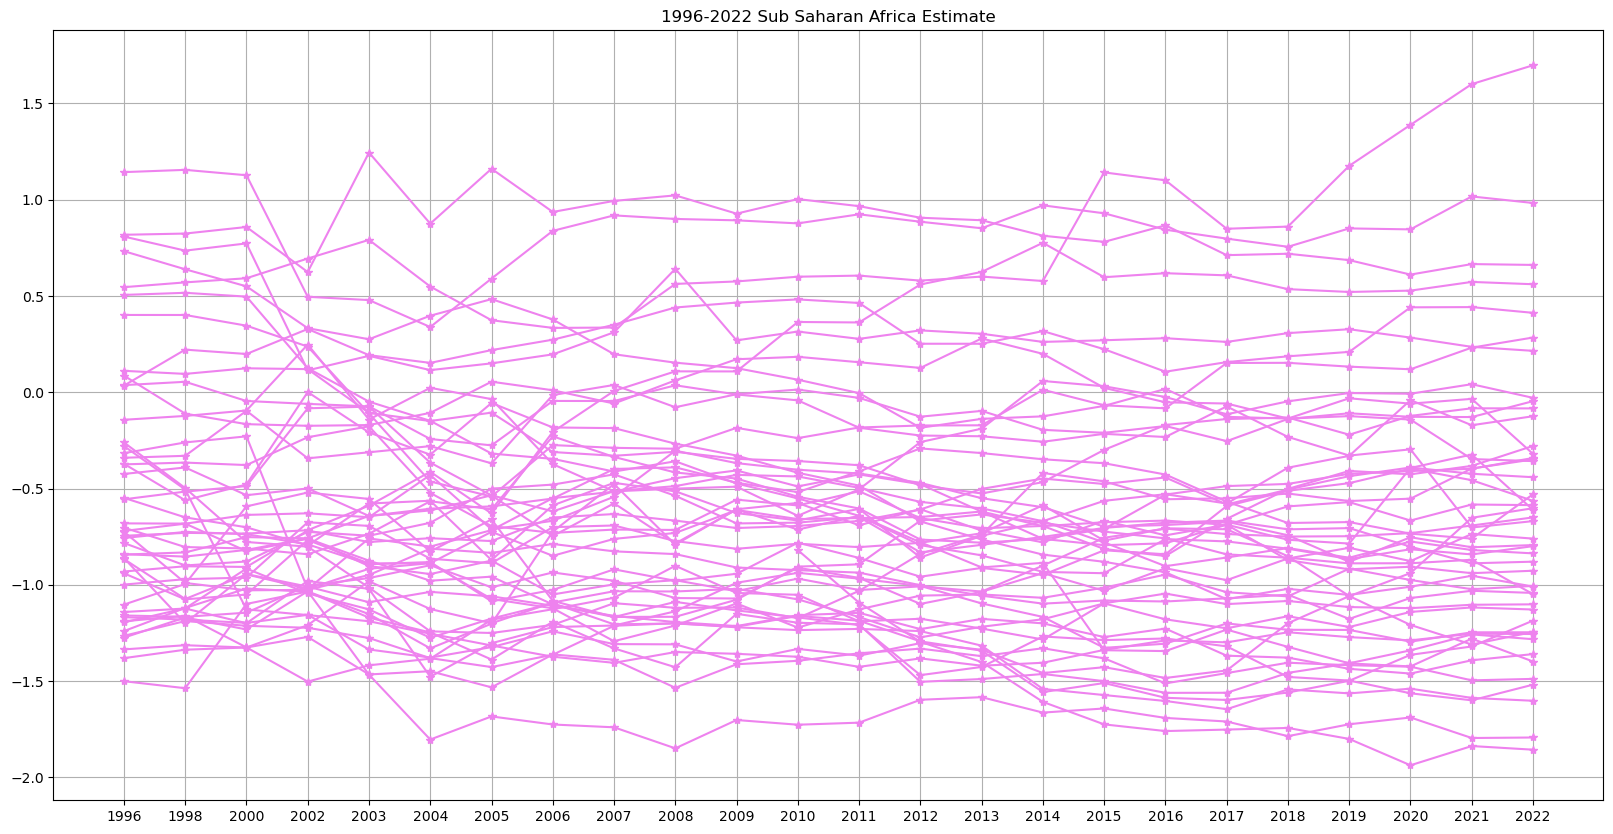

In [26]:
# Переименуем названия столбцов
years = np.arange(1996, 2023, 1)

# Удалим года, информации о которых нет (1997, 1999, 2001)
years = np.delete(years, 1)
years = np.delete(years, 2)
years = np.delete(years, 3)

# Для корректного отображения преобразуем years в строку
df_estimate.columns = map(str, years)

# Отобразим данные в виде графиков
df_estimate.T.plot(color='violet', figsize=(20,10), title='1996-2022 Sub Saharan Africa Estimate', marker='*', xticks = range(len(years)), legend = False, grid=True)

### Найдем страны с наибольшим и наименьшим значением WGI региона SSA за 2022 год (estimate)

In [27]:
# Наибольшее значение WGI региона
max_estimate = df_estimate['2022'].idxmax()
max_estimate

'Seychelles'

In [28]:
# Наименьшее значение WGI региона
min_estimate = df_estimate['2022'].idxmin() 
min_estimate

'South Sudan'

### Определим средние значения региона SSA за каждый год в период с 1996 по 2022 (estimate)

In [29]:
# Средние значения WGI региона
mean = df_estimate.mean()
mean

1996   -0.526003
1998   -0.551466
2000   -0.545919
2002   -0.554189
2003   -0.589383
2004   -0.658061
2005   -0.659048
2006   -0.618499
2007   -0.600693
2008   -0.595974
2009   -0.590122
2010   -0.595736
2011   -0.610929
2012   -0.652935
2013   -0.658446
2014   -0.659135
2015   -0.668719
2016   -0.671172
2017   -0.679782
2018   -0.671723
2019   -0.668655
2020   -0.643094
2021   -0.629466
2022   -0.631573
dtype: float64

### Построим графики индекса WGI за 1996-2022 для стран SSA и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ.

In [30]:
# Транспонируем
df_estimate = df_estimate.T

<Axes: title={'center': '1996-2022 Sub Saharan Africa Estimate'}>

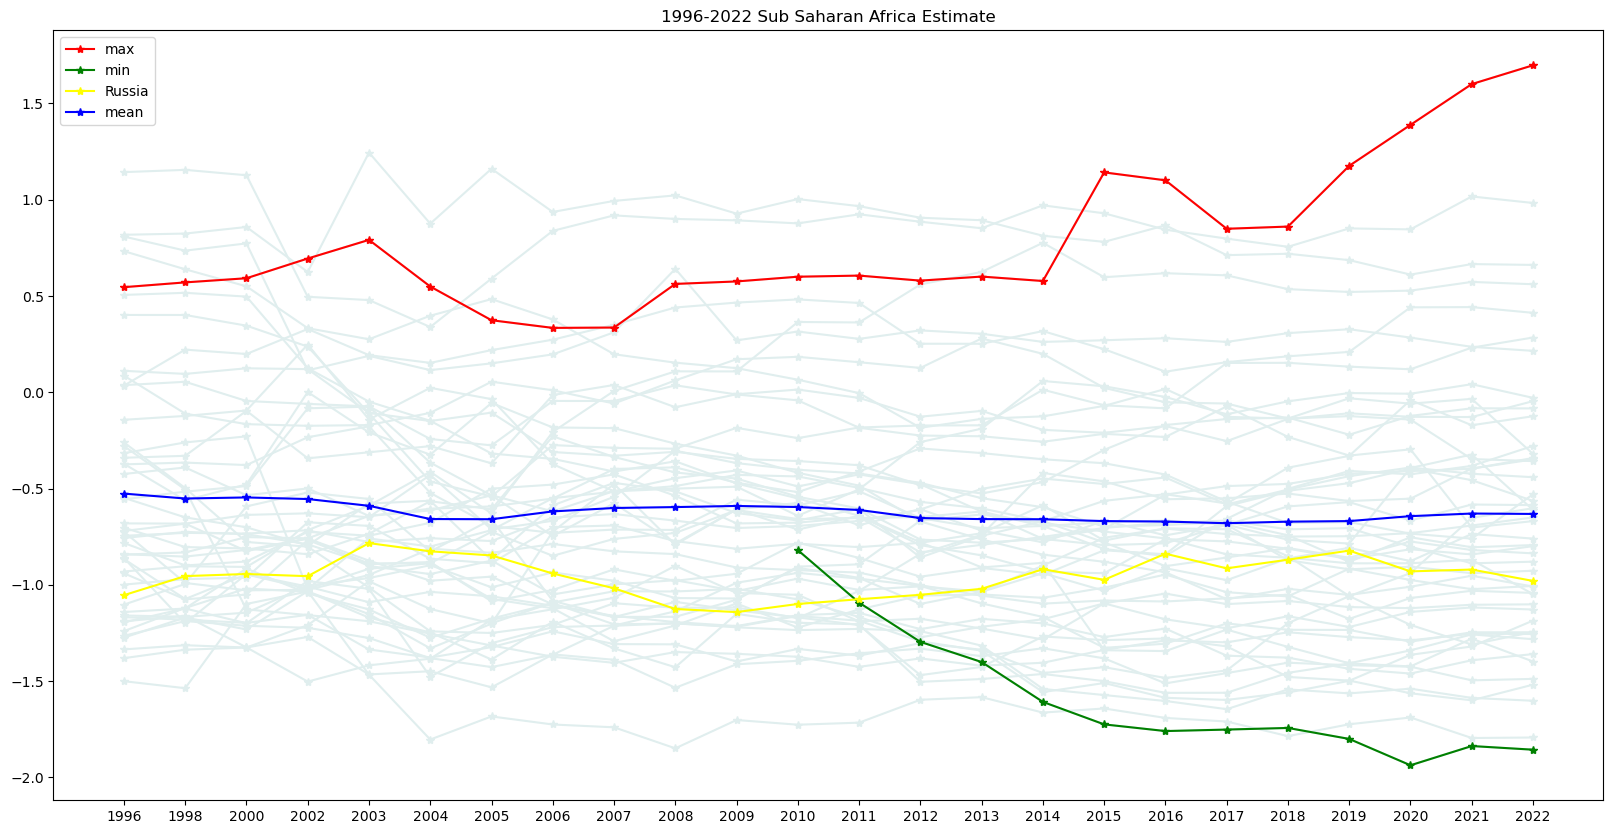

In [31]:
# Отобразим данные в виде графиков
df_estimate.plot(color='#E0EEEE', figsize=(20,10), title='1996-2022 Sub Saharan Africa Estimate', marker='*', legend = False, grid=True)

# Наибольшее значение WGI региона
df_estimate[max_estimate].plot(label="max", color='red', marker='*', legend=True)

# Наименьшее значение WGI региона
df_estimate[min_estimate].plot(label="min", color='green', marker='*', legend=True)

# Среднее значение по РФ
RF = df_merged.set_index('Country/Territory').T.get("Russian Federation").filter(regex='Estimate')
RF.plot(label="Russia", color='yellow', marker='*', legend=True)

# Среднее значение по региону
mean.T.plot(color='blue', marker='*', legend=True, label="mean", xticks = range(len(years)))

### Определим, как изменилось значение показателя rank с 1996 по 2022 для Europe and Central Asia

In [121]:
# Фильтруем по региону согласно варианту ECA и установим индекс Country/Territory
df_ECA = df_merged[df_merged.Region=='ECA'].set_index('Country/Territory')

# Выбираем из таблицы столбцы Rank (1996 год) и Rank.23 (2022 год)
df_ECA = df_ECA.filter(items = ['Rank', 'Rank.23']) 

# Находим разницу rank между 2022 и 1996 годом
df_ECA['Diff'] = df_ECA['Rank'] - df_ECA['Rank.23']

# Меняем заголовки столбца
df_ECA.columns = ['1996', '2022', 'Difference']

df_ECA

,1996,2022,Difference
Country/Territory,,,
Albania,19.354839,38.679245,-19.324406
Armenia,38.172043,56.132076,-17.960033
Azerbaijan,2.688172,16.981133,-14.292960
Belarus,42.473118,31.603773,10.869345
Bosnia and Herzegovina,48.924732,25.943396,22.981337
Georgia,1.075269,72.169815,-71.094546
Kazakhstan,12.365591,48.584908,-36.219316
Kosovo,NaN,47.169811,NaN
Kyrgyz Republic,17.204302,10.377358,6.826943


### Выведем таблицу для варианта 3 - Europe and Central Asia (WGI - rank)

In [122]:
# Переменные, хранящие названия стран с максимальным и минимальным rank
max_eca = df_ECA['2022'].idxmax()
min_eca = df_ECA['2022'].idxmin()

# Данные, содержащиеся в таблице
data = [
    ["ECA", "-", df_ECA['1996'].mean(), df_ECA['2022'].mean(), df_ECA['2022'].mean()-df_ECA['1996'].mean()],
    ["ECA", max_eca, df_ECA['1996'][max_eca], df_ECA['2022'][max_eca], df_ECA['2022'][max_eca]-df_ECA['1996'][max_eca]],
    ["ECA", min_eca, df_ECA['1996'][min_eca], df_ECA['2022'][min_eca], df_ECA['2022'][min_eca]-df_ECA['1996'][min_eca]],
    ["ECA", "Russian Federation", df_ECA['1996']["Russian Federation"], df_ECA['2022']["Russian Federation"], df_ECA['2022']["Russian Federation"]-df_ECA['1996']["Russian Federation"]],
    ]

# Названия строк и столбцов
df_table = pd.DataFrame(data, columns=["Регион", "Страна", "WGI 1996", "WGI 2022", "Изменение"], 
                  index=["mean_2022", "max_2022", "min_2022", "Russia_2022"])
df_table

,Регион,Страна,WGI 1996,WGI 2022,Изменение
mean_2022,ECA,-,22.390892,33.714002,11.323110
max_2022,ECA,Georgia,1.075269,72.169815,71.094546
min_2022,ECA,Turkmenistan,15.591398,5.660378,-9.931021
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


### Отобразим диаграмму размаха (boxplot) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (estimate)

<Axes: >

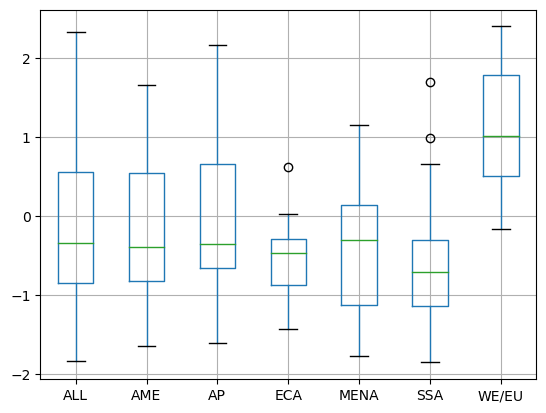

In [128]:
# Группируем по региону и выбираем столбцы estimate за 2022 год и country
regions = df_merged.groupby('Region')[['Estimate.23', 'Country']]
df_box = []

# Формируем массив DataFrame'ов по каждому региону
for region in regions:
    df_box.append(region[1].set_index('Country').set_axis([region[0]], axis = 1))

# Создаем DataFrame для всех стран и добавляем его к массиву
df_all_regions = df_merged.set_index('Country/Territory').filter(regex = 'Estimate.23').set_axis(['ALL'], axis = 1)
df_box.append(df_all_regions)

# Объединяем массив DataFrame'ов
df_box = pd.concat(df_box, sort = True)
df_box.boxplot()

## Задание 2.

### Загрузить данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv)

In [134]:
# Подключение всех файлов
import glob
from pathlib import Path

glob_file = glob.glob('./stock/*.csv')

# Создаем переменную для хранения значений
df_file = {}

# Цикл прохождения по всем файлам
for file in glob_file:
    data = pd.read_csv(file, index_col='Date') # Считываем данные 
    data_name = Path(file).stem # Получаем название файла
    df_file[data_name] = data['Close']

# Объединение всех файлов
df_all_files = pd.concat(df_file, axis=1, sort = True)
df_all_files.head(10)

,CSCO,GTLB,ADBE,TCOM,DBX,ABNB,ORCL,EBAY,AMZN,INTC,...,TWLO,NFLX,TSLA,GOOGL,META,SHOP,SPOT,XIACY,AAPL,MU
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,55.669998,64.010002,534.299988,26.610001,24.750000,153.970001,81.160004,60.070000,149.573502,48.820000,...,206.119995,427.140015,312.239990,135.303497,313.260010,NaN,196.259995,10.7350,174.779999,82.269997
2022-02-01,55.770000,58.270000,467.679993,25.820000,22.690001,151.490005,75.970001,54.590000,153.563004,47.700001,...,174.800003,394.519989,290.143341,135.057007,211.029999,NaN,156.190002,9.5500,165.119995,88.860001
2022-03-01,55.759998,54.450001,455.619995,23.120001,23.250000,171.759995,82.730003,57.259998,162.997498,49.560001,...,164.809998,374.589996,359.200012,139.067505,222.360001,NaN,151.020004,8.7199,174.610001,77.889999
2022-04-01,48.980000,47.930000,395.950012,23.650000,21.750000,153.210007,73.400002,51.919998,124.281502,43.590000,...,111.820000,190.360001,290.253326,114.109497,200.470001,NaN,101.650002,7.5400,157.649994,68.190002
2022-05-01,45.049999,38.939999,416.480011,22.059999,20.840000,120.870003,71.919998,48.669998,120.209503,44.419998,...,105.169998,197.440002,252.753326,113.762001,193.639999,NaN,112.769997,7.6300,148.839996,73.839996
2022-06-01,42.639999,53.139999,366.059998,27.450001,20.990000,89.080002,69.870003,41.669998,106.209999,37.410000,...,83.809998,174.869995,224.473328,108.962997,161.250000,NaN,93.830002,8.6300,136.720001,55.279999
2022-07-01,45.369999,57.400002,410.119995,25.780001,22.740000,110.980003,77.839996,48.630001,134.949997,36.310001,...,84.800003,224.899994,297.149994,116.320000,159.100006,NaN,113.019997,7.8900,162.509995,61.860001
2022-08-01,44.720001,59.869999,373.440002,25.719999,21.389999,113.120003,74.150002,44.130001,126.769997,31.920000,...,69.580002,223.559998,275.609985,108.220001,162.929993,NaN,108.150002,7.1900,157.220001,56.529999
2022-09-01,40.000000,51.220001,275.200012,27.309999,20.719999,105.040001,61.070000,36.810001,113.000000,25.770000,...,69.139999,235.440002,265.250000,95.650002,135.679993,NaN,86.300003,5.5800,138.199997,50.099998


### Рассчитаем корреляционную матрицу для всех акций

In [139]:
# Корреляционная матрица для всех акций
df_all_files.corr().head(10)

,CSCO,GTLB,ADBE,TCOM,DBX,ABNB,ORCL,EBAY,AMZN,INTC,...,TWLO,NFLX,TSLA,GOOGL,META,SHOP,SPOT,XIACY,AAPL,MU
CSCO,1.000000,0.068856,0.554172,0.257188,0.496982,0.594365,0.463955,0.494938,0.404820,0.420854,...,0.383777,0.497727,0.253808,0.600025,0.374998,-0.144612,0.424007,0.474311,0.589552,0.472688
GTLB,0.068856,1.000000,0.496556,0.103614,0.402517,0.460602,0.138574,0.251066,0.690644,0.535441,...,0.310273,0.452625,0.260908,0.535473,0.467641,0.855342,0.540113,0.453669,0.282373,0.543109
ADBE,0.554172,0.496556,1.000000,0.533298,0.816359,0.670509,0.785432,0.180354,0.819614,0.713875,...,0.067604,0.821314,0.071508,0.915440,0.873388,0.783919,0.863827,0.697612,0.833129,0.817961
TCOM,0.257188,0.103614,0.533298,1.000000,0.423136,0.294269,0.836340,-0.149330,0.309545,-0.014994,...,-0.562073,0.766681,-0.586854,0.322718,0.707029,0.592950,0.640120,0.237659,0.439363,0.402677
DBX,0.496982,0.402517,0.816359,0.423136,1.000000,0.332740,0.667833,-0.157363,0.478171,0.390625,...,-0.113102,0.635239,0.037233,0.669228,0.552874,0.424923,0.525305,0.382992,0.740429,0.440043
ABNB,0.594365,0.460602,0.670509,0.294269,0.332740,1.000000,0.471504,0.644140,0.830690,0.738241,...,0.429915,0.646901,0.353807,0.780440,0.723419,0.696599,0.753797,0.564475,0.617430,0.842928
ORCL,0.463955,0.138574,0.785432,0.836340,0.667833,0.471504,1.000000,-0.070414,0.534556,0.239485,...,-0.393536,0.859397,-0.310021,0.618983,0.821696,0.635736,0.763100,0.324511,0.769309,0.570765
EBAY,0.494938,0.251066,0.180354,-0.149330,-0.157363,0.644140,-0.070414,1.000000,0.434078,0.580047,...,0.753732,0.138580,0.434899,0.375794,0.190361,0.338672,0.296858,0.535223,0.115591,0.512637
AMZN,0.404820,0.690644,0.819614,0.309545,0.478171,0.830690,0.534556,0.434078,1.000000,0.816519,...,0.314869,0.735466,0.302321,0.912332,0.830910,0.824934,0.875779,0.654564,0.665715,0.906932
INTC,0.420854,0.535441,0.713875,-0.014994,0.390625,0.738241,0.239485,0.580047,0.816519,1.000000,...,0.585988,0.447049,0.425236,0.826042,0.594611,0.809582,0.645555,0.791377,0.507251,0.839860


### Отобразим корреляционную матрицу в виде диаграммы. 

<Axes: title={'center': 'Корреляционная матрица'}>

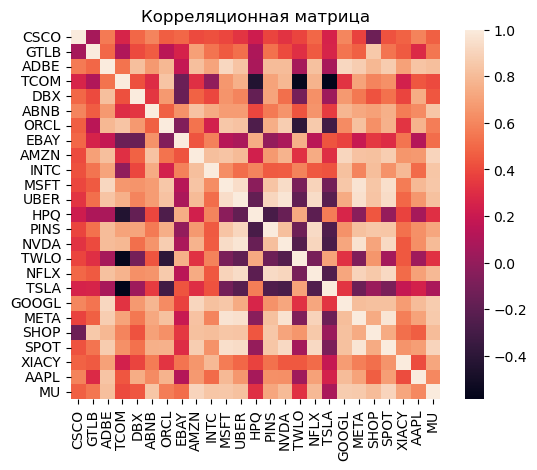

In [146]:
# Подключим библиотеку для диаграмм heatmap
import seaborn as sns

# Вывод диаграммы
plt.title("Корреляционная матрица")
sns.heatmap(df_all_files.corr(), square = True)

### В соответствии с вариантом №3 Uber (UBER) определить:
- акцию с максимальной положительной корреляцией (max)
- акцию с максимальной отрицательной корреляцией (min)
- акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none)

In [156]:
# Найдем корреляции акций, удалим лишнюю строчку с Uber
df_uber = df_all_files.corr().drop(["UBER"], axis = 1)
df_uber = df_uber.loc[["UBER"]].T
df_uber

,UBER
CSCO,0.326346
GTLB,0.521399
ADBE,0.834611
TCOM,0.754442
DBX,0.595928
ABNB,0.680764
ORCL,0.832075
EBAY,0.085736
AMZN,0.796897
INTC,0.512572


In [161]:
# Определим акцию с максимальной положительной корреляцией (max)
max_corr = df_uber.filter(regex='UBER').idxmax()
max_corr[0]

'NVDA'

In [194]:
# Определим акцию с максимальной отрицательной корреляцией (min)
min_corr = df_uber.filter(regex='UBER').idxmin()
min_corr[0]

'TSLA'

In [213]:
# Определим акцию с корреляцией, ближайшей к none
closest_to_zero_corr = df_uber.filter(regex='UBER').abs().idxmin() 
closest_to_zero_corr[]

'EBAY'

### Построим диаграммы разброса 
- (Ваша компания - Компания с min),
- (Ваша компания - Компания с max),
- (Ваша компания - Компания с none)

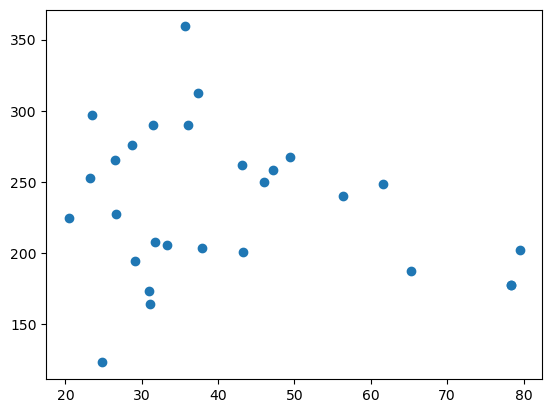

In [215]:
# Диаграмма разброса UBER - Компания с min (TSLA)
plt.scatter(df_all_files["UBER"], df_all_files[min_corr[0]])

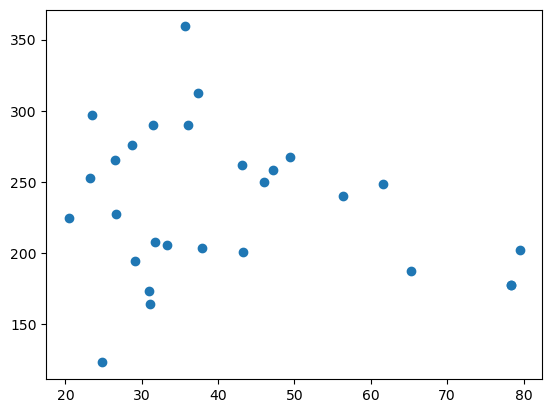

In [216]:
# Диаграмма разброса с UBER - Компания с max (NVDA)
plt.scatter(df_all_files["UBER"], df_all_files[min_corr[0]])

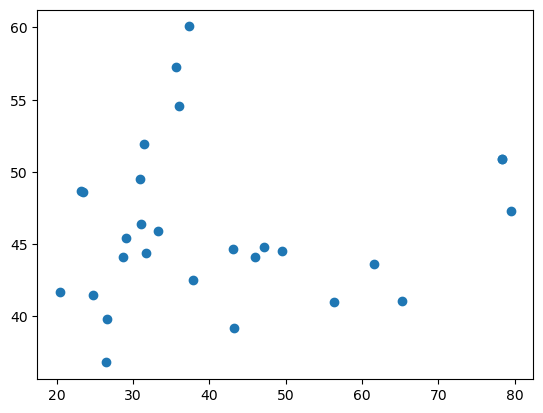

In [217]:
# Диаграмма разброса с UBER - Компания с none (EBAY)
plt.scatter(df_all_files["UBER"], df_all_files[closest_to_zero_corr[0]])

### Рассчет средней цены акций для каждого месяца (исходные данные взяты с интервалом в месяц)

In [222]:
# Cредняя цена акций для каждого месяца
mean_per_month = df_all_files.T.mean()
mean_per_month

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
dtype: float64

### Постройте графики для акций из пункта 4 и средней из пункта 6.

<Axes: title={'center': 'Графики акций'}, xlabel='Date'>

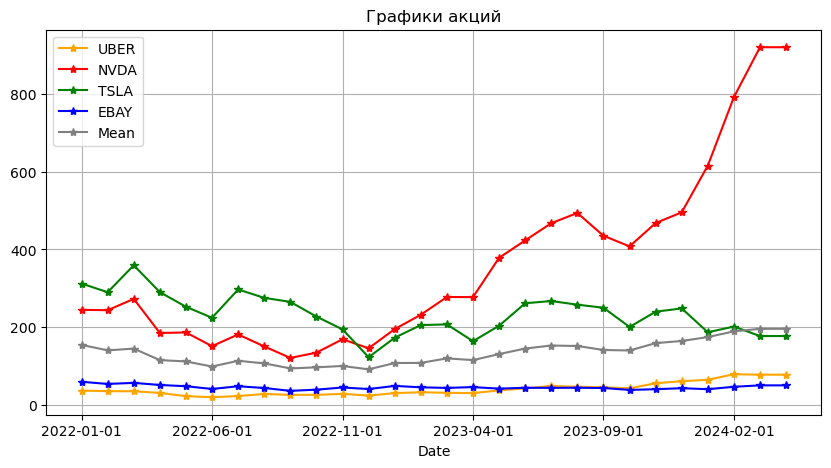

In [253]:
# Построение графиков для акций
df_all_files["UBER"].plot(color='orange', marker='*', legend=True)
df_all_files[max_corr[0]].plot(color='r', marker='*', legend=True) 
df_all_files[min_corr[0]].plot(color='g', marker='*', legend=True)
df_all_files[closest_to_zero_corr[0]].plot(color='blue', marker='*', legend=True)
mean.plot(title="Графики акций", figsize=(10,5), grid=1, color='grey', marker='*', legend=True, label='Mean')

##### Вывод: 
В ходе выполнения домашнего задания был приобретен опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.